In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import warnings
from IPython.display import clear_output
from multiprocessing import Pool
from time import time

warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv("../data/beijing-18/processed/final_data_mar.csv.gz")
# data = pd.get_dummies(data, columns=['weather', 'wind_direction'])
display(data.head(2), data.tail(2))

,time,station_id,longitude,latitude,PM25_Concentration,weather,temperature,humidity,wind_speed,wind_direction,filled
0,2014-05-01 00:00:00,1002,116.20531,40.00395,89.0,0.0,20.0,56.0,7.92,13.0,False
1,2014-05-01 01:00:00,1002,116.20531,40.00395,85.0,0.0,18.0,64.0,7.56,13.0,False


,time,station_id,longitude,latitude,PM25_Concentration,weather,temperature,humidity,wind_speed,wind_direction,filled
262798,2015-04-30 22:00:00,1036,116.0,39.579999,88.0,5.0,24.4,47.0,2.7,23.0,False
262799,2015-04-30 23:00:00,1036,116.0,39.579999,88.0,1.0,19.8,72.0,2.6,23.0,True


In [8]:
all_stations = data.station_id.unique()
all_stations

array([1002, 1003, 1004, 1005, 1006, 1007, 1008, 1010, 1011, 1012, 1014,
       1016, 1017, 1018, 1019, 1022, 1023, 1024, 1025, 1026, 1027, 1028,
       1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036])

In [9]:
splitter = KFold(n_splits=3, shuffle=True, random_state=12345)

for f_i, (train, test) in enumerate(splitter.split(all_stations)):
    train_stations = all_stations[train]
    test_stations = all_stations[test]
    train_data = data[data.station_id.isin(train_stations)]
    test_data = data[data.station_id.isin(test_stations)]

    train_data.to_csv(
        "../data/beijing-18/processed/fold_" + str(f_i) + "_train_mar_nsgp.csv.gz",
        index=None,
    )
    test_data.to_csv(
        "../data/beijing-18/processed/fold_" + str(f_i) + "_test_mar_nsgp.csv.gz",
        index=None,
    )

### Visualize

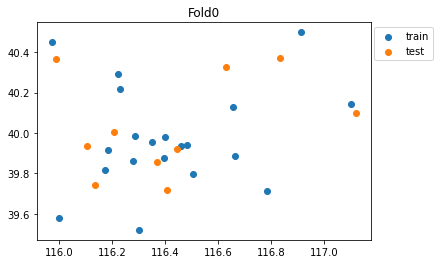

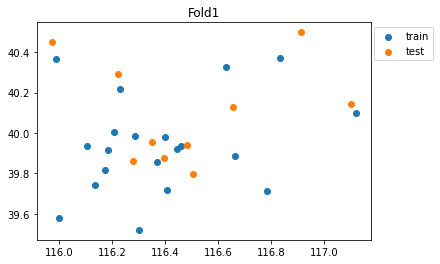

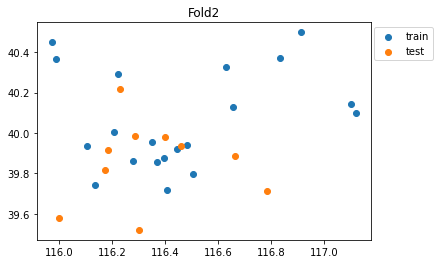

In [10]:
for f_i, (train, test) in enumerate(splitter.split(all_stations)):
    train_stations = all_stations[train]
    test_stations = all_stations[test]
    tmp_trn_df = data[data.station_id.isin(train_stations)].drop_duplicates(
        "station_id"
    )
    tmp_tst_df = data[data.station_id.isin(test_stations)].drop_duplicates("station_id")
    plt.figure()
    plt.title("Fold" + str(f_i))
    plt.scatter(tmp_trn_df["longitude"], tmp_trn_df["latitude"], label="train")
    plt.scatter(tmp_tst_df["longitude"], tmp_tst_df["latitude"], label="test")
    plt.legend(bbox_to_anchor=(1.2, 1))